<a href="https://colab.research.google.com/github/shilz1007/shilz1007/blob/main/AI_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt
import numpy as np
import PIL
import PIL.Image
import os


In [ ]:
path = '/content/drive/MyDrive/archive/train'

In [ ]:
image_height = 224
image_width = 224
batch_size = 50
train_images = tf.keras.preprocessing.image_dataset_from_directory(path,
                validation_split =0.2
                ,labels="inferred"
                ,subset = 'training'
                ,seed = 123
                ,image_size=(image_height,image_width)
                ,batch_size = batch_size )

Found 680 files belonging to 2 classes.
Using 544 files for training.


In [ ]:
val_images = tf.keras.preprocessing.image_dataset_from_directory(path,
              validation_split = 0.2
              ,labels="inferred"
              ,subset='validation'
              ,seed=123
              ,image_size=(image_height,image_width)
              ,batch_size = batch_size)

Found 680 files belonging to 2 classes.
Using 136 files for validation.


['adults', 'children']


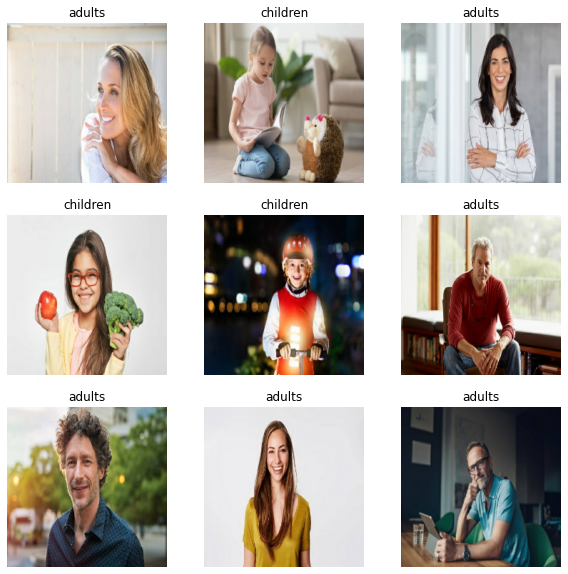

In [ ]:
class_names = train_images.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
print(class_names)


In [ ]:
#for image_batch in train_images:
#  print(image_batch.shape)
print(train_images)  
#print(labels_batch)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False, 
                    input_shape=(224,224,3),
                    pooling='avg',
                    classes=2,
                    weights='imagenet')

for layer in pretrained_model.layers:
  layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(1,activation='sigmoid'))

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


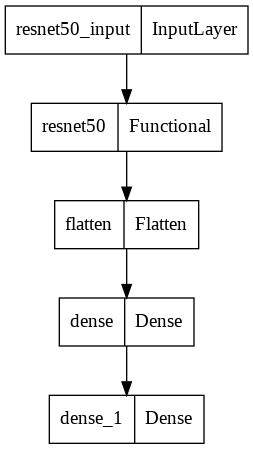

In [ ]:
tf.keras.utils.plot_model(resnet_model)

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=resnet_model.fit(train_images,validation_data=val_images,epochs=10)

Epoch 1/10
11/11 [==============================] - 92s 8s/step - loss: 1.4258 - accuracy: 0.5643 - val_loss: 0.5116 - val_accuracy: 0.7794
Epoch 2/10
11/11 [==============================] - 72s 7s/step - loss: 0.5104 - accuracy: 0.7426 - val_loss: 0.5089 - val_accuracy: 0.7574
Epoch 3/10
11/11 [==============================] - 72s 7s/step - loss: 0.4025 - accuracy: 0.8143 - val_loss: 0.5185 - val_accuracy: 0.7721
Epoch 4/10
11/11 [==============================] - 72s 7s/step - loss: 0.2988 - accuracy: 0.8787 - val_loss: 0.5079 - val_accuracy: 0.7868
Epoch 5/10
11/11 [==============================] - 72s 7s/step - loss: 0.2453 - accuracy: 0.9007 - val_loss: 0.4930 - val_accuracy: 0.7941
Epoch 6/10
11/11 [==============================] - 72s 7s/step - loss: 0.1896 - accuracy: 0.9393 - val_loss: 0.5223 - val_accuracy: 0.7868
Epoch 7/10
11/11 [==============================] - 72s 7s/step - loss: 0.1629 - accuracy: 0.9596 - val_loss: 0.5099 - val_accuracy: 0.8015
Epoch 8/10
11/11 [==

In [ ]:
path_test = '/content/drive/MyDrive/archive/test'

In [ ]:
resnet_model.save('/content/drive/MyDrive/resnet_model.h5')

In [ ]:
test_images = tf.keras.preprocessing.image_dataset_from_directory(path_test
              ,labels="inferred"
              ,seed=123
              ,image_size=(image_height,image_width)
              ,batch_size = batch_size)

Found 120 files belonging to 2 classes.


['adults', 'children']


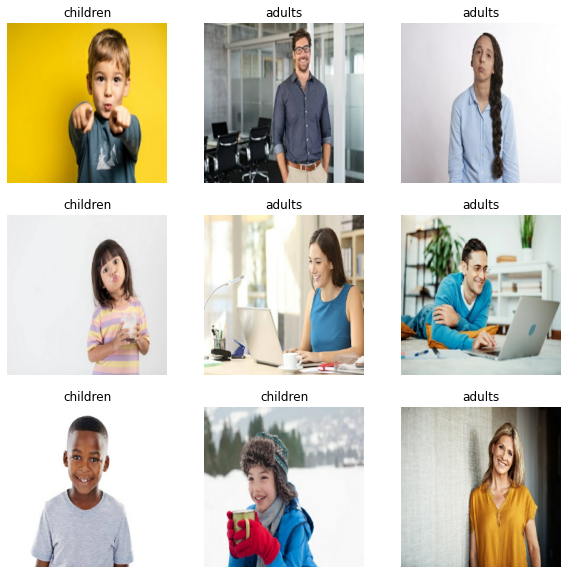

In [ ]:
class_names = test_images.class_names
plt.figure(figsize=(10, 10))
for images, labels in test_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
print(class_names)

In [ ]:
predictions = resnet_model.predict(x=test_images,steps=len(test_images),verbose=0)

In [ ]:
np.round(predictions)

In [ ]:
import pandas as pd


In [ ]:
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction.csv')

In [ ]:
inceptionV3_model = Sequential()

pretrained_InceptionV3 = tf.keras.applications.InceptionV3(include_top=False, 
                    input_shape=(224,224,3),
                    pooling='avg',
                    classes=2,
                    weights='imagenet')

for layer in pretrained_InceptionV3.layers:
  layer.trainable=False

inceptionV3_model.add(pretrained_model)
inceptionV3_model.add(Flatten())
inceptionV3_model.add(Dense(512,activation='relu'))
inceptionV3_model.add(Dense(1,activation='sigmoid'))

In [ ]:
inceptionV3_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
inceptionV3_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=inceptionV3_model.fit(train_images,validation_data=val_images,epochs=10)

Epoch 1/10
17/17 [==============================] - 111s 6s/step - loss: 1.0443 - accuracy: 0.6140 - val_loss: 0.5003 - val_accuracy: 0.7941
Epoch 2/10
17/17 [==============================] - 106s 6s/step - loss: 0.4114 - accuracy: 0.8162 - val_loss: 0.5121 - val_accuracy: 0.7941
Epoch 3/10
17/17 [==============================] - 106s 6s/step - loss: 0.2774 - accuracy: 0.8915 - val_loss: 0.5117 - val_accuracy: 0.7868
Epoch 4/10
17/17 [==============================] - 106s 6s/step - loss: 0.2286 - accuracy: 0.9154 - val_loss: 0.5415 - val_accuracy: 0.8015
Epoch 5/10
17/17 [==============================] - 106s 6s/step - loss: 0.1903 - accuracy: 0.9320 - val_loss: 0.6203 - val_accuracy: 0.7353
Epoch 6/10
17/17 [==============================] - 106s 6s/step - loss: 0.1483 - accuracy: 0.9669 - val_loss: 0.5562 - val_accuracy: 0.7721
Epoch 7/10
17/17 [==============================] - 106s 6s/step - loss: 0.0921 - accuracy: 0.9816 - val_loss: 0.5701 - val_accuracy: 0.7868
Epoch 8/10
17

In [ ]:
inceptionV3_model.save('/content/drive/MyDrive/inceptionV3_model.h5')

In [ ]:
predictions = inceptionV3_model.predict(x=test_images,steps=len(test_images),verbose=0)

In [ ]:
np.round(predictions)

In [ ]:
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction_Inception.csv')